 # AI Community @ Семинар  № 4
 ## Логистическая регрессия

In [1]:
import numpy as np
from sklearn.datasets import make_classification

import seaborn as sns
import matplotlib.pyplot as plt

### Сгенерируем датасет

In [2]:
np.random.seed(2020)
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, 
                           n_redundant=0, n_clusters_per_class=1,
                           flip_y=0., class_sep=1.5)

[]

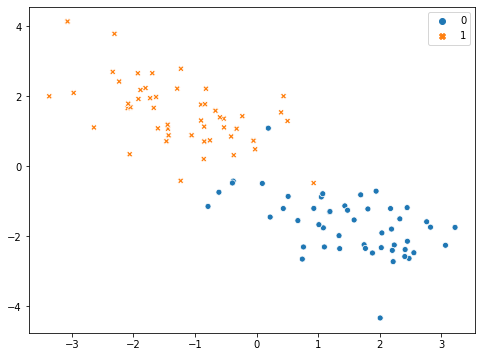

In [3]:
plt.figure(figsize=(8, 6))
sns.scatterplot(X[:, 0], X[:, 1], hue=y, style=y)
plt.plot()

### Напишите функцию сигмоиды и логистическую регрессию
$$\sigma(x) = \frac{1}{1+e^{-x}}$$
$$f(x; W, b) = W x + b$$

In [4]:
def sigmoid(x):
    return <your code here>

def logistic_regression(x, W, b):
    return <your code here>

np.random.seed(2)
W = np.random.randn(X.shape[1])
b = np.array(0.)

# Test your code
assert logistic_regression(X, W, b).shape == (100,)
assert np.all(0 < logistic_regression(X, W, b))
assert np.all(logistic_regression(X, W, b) < 1)

### Нарисуем разделяющую гиперплоскость рандомных весов

Random weights initialization


[]

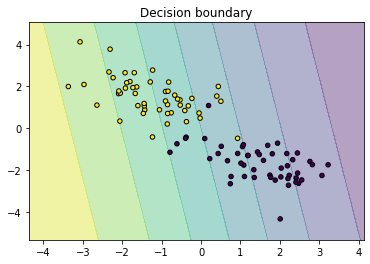

In [5]:
def plot_decision_boundary(X, y, W, b):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = logistic_regression(np.c_[xx.ravel(), yy.ravel()], W, b)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    plt.title('Decision boundary')
    return plt.plot()
    
print('Random weights initialization')
plot_decision_boundary(X, y, W, b)

### Напишите бинарный Log Loss
$$L = -[y \log(y_{pred}) + (1-y) \log(1-y_{pred})]$$

In [6]:
def binary_logloss(y_pred, y, eps=1e-8):
    return <your code here>

y_pred = logistic_regression(X, W, b)

# Test your code
assert binary_logloss(y_pred, y).shape == y.shape
assert np.all(binary_logloss(y_pred, y) > 0)

### Напишите частные производные
$$ \frac{\partial L}{\partial \sigma} = \frac{y}{\sigma} - \frac{1-y}{1-\sigma} $$
$$ \frac{\partial \sigma}{\partial z} = \sigma(z)(1-\sigma(z)) $$
$$ \frac{\partial z}{\partial W} = x $$
$$ \frac{\partial z}{\partial b} = 1 $$

### Не забудьте про деление на 0!

In [7]:
def dL_dsigma(y, sigma, eps=1e-8):
    return <your code here>

def dsigma_dz(sigma):
    return <your code here>

def dz_dW(x):
    return <your code here>

def dz_db(x):
    return np.array([1.])


z = np.dot(X, W) + b
sigma = sigmoid(z)
loss = binary_logloss(sigma, y)

# Test your code
assert dL_dsigma(y, sigma).shape == (X.shape[0],)
assert dsigma_dz(sigma).shape == (X.shape[0],)
assert dz_dW(X).shape == X.shape

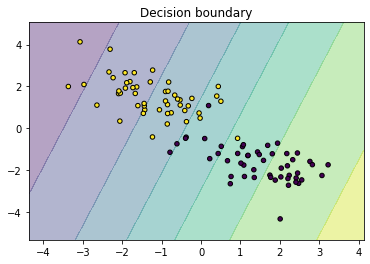

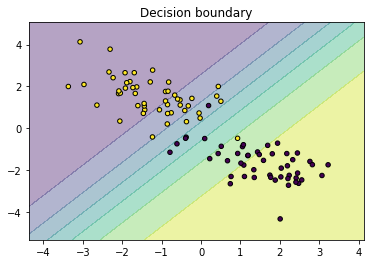

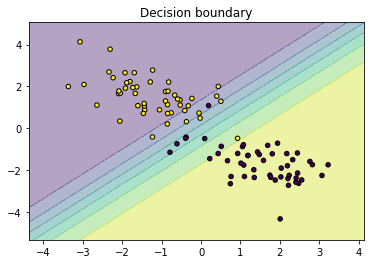

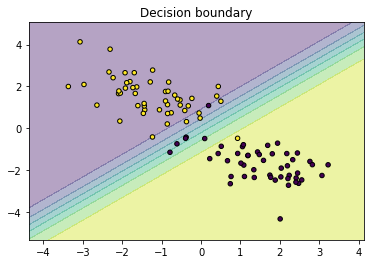

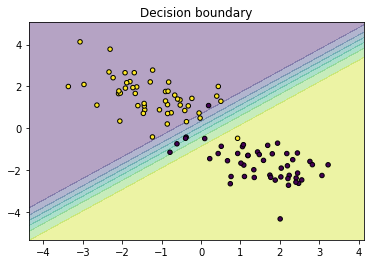

In [8]:
from IPython.display import clear_output

learning_rate = 0.01

np.random.seed(42)
W = np.random.randn(X.shape[1])
b = np.array(0.)

for i in range(200):
    if i%40 == 0:
        plot_decision_boundary(X, y, W, b)
        plt.pause(0.05)
    
    z = np.dot(X, W) + b
    y_pred = sigmoid(z)
    loss = binary_logloss(y_pred, y)
    
    dL_dz = dL_dsigma(y, y_pred) * dsigma_dz(y_pred)
    dL_dW = dL_dz.reshape(-1, 1) * dz_dW(X)
    dL_db = dL_dz * dz_db(X)
    
    # average gradients
    dL_dW = dL_dW.mean(axis=0)
    dL_db = dL_db.mean()
    
    W -= learning_rate * dL_dW
    b -= learning_rate * dL_db

### check accuracy of your implementation

In [9]:
from sklearn.metrics import accuracy_score

y_pred = logistic_regression(X, W, b)
y_pred = 1 - (y_pred > 0.5).astype(int)
accuracy_score(y, y_pred)

0.98